## TASK 1

In [1]:
from ultralytics import YOLO
import cv2
import os
import json
import matplotlib.pyplot as plt
from collections import defaultdict

In [4]:
video_path = 'input/VIDEO.mp4'
output_json_path = 'outputs/detections.json'
annotated_dir = 'outputs/annotated_frames'
bar_chart_path = 'outputs/object_frequency.png'
frame_skip = 5


os.makedirs(annotated_dir, exist_ok=True)


model = YOLO('yolov5s.pt')  



cap = cv2.VideoCapture(video_path)
frame_id = 0
detections = {}
class_counts = defaultdict(int)
frame_class_diversity = {}

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if frame_id % frame_skip == 0:
        results = model(frame)[0]
        frame_data = []

        for box in results.boxes:
            cls_id = int(box.cls[0])
            label = model.names[cls_id]
            conf = float(box.conf[0])
            x1, y1, x2, y2 = map(int, box.xyxy[0])

            frame_data.append({
                "label": label,
                "confidence": round(conf, 3),
                "bbox": [x1, y1, x2, y2]
            })

            class_counts[label] += 1


            cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)
            cv2.putText(frame, f'{label} {conf:.2f}', (x1, y1-5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)


        detections[f"frame_{frame_id}"] = frame_data
        frame_class_diversity[f"frame_{frame_id}"] = len(set(d['label'] for d in frame_data))

        cv2.imwrite(f"{annotated_dir}/frame_{frame_id}.jpg", frame)

    frame_id += 1

cap.release()

with open(output_json_path, 'w') as f:
    json.dump(detections, f, indent=2)

max_div_frame = max(frame_class_diversity, key=frame_class_diversity.get)
print(f"Frame with max class diversity: {max_div_frame} ({frame_class_diversity[max_div_frame]} classes)")


PRO TIP  Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.


0: 384x640 7 persons, 1 backpack, 137.8ms
Speed: 21.7ms preprocess, 137.8ms inference, 11.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 1 backpack, 117.0ms
Speed: 1.8ms preprocess, 117.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 1 backpack, 101.4ms
Speed: 1.6ms preprocess, 101.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 94.8ms
Speed: 1.2ms preprocess, 94.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 1 backpack, 114.8ms
Speed: 1.4ms preprocess, 114.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 persons, 95.1ms
Speed: 2.3ms preproc

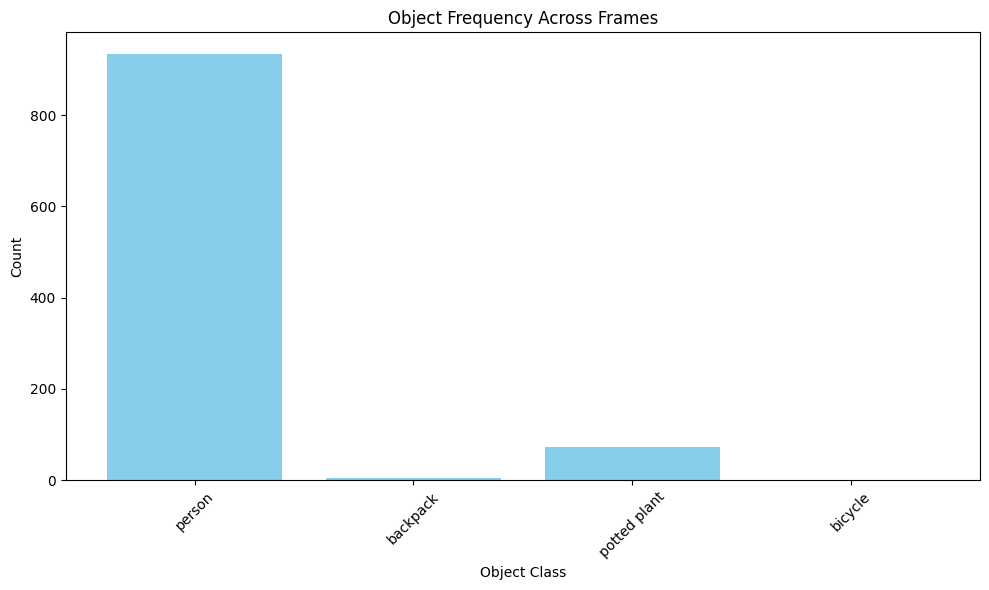

In [5]:
plt.figure(figsize=(10,6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title("Object Frequency Across Frames")
plt.xlabel("Object Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(bar_chart_path)
plt.show()

## How I did it – Step-by-step:


1. Loaded the video using OpenCV.

2. Loaded YOLOv5 model to detect objects.

3. Processed every 5th frame from the video.

4. For each processed frame:

- Ran object detection.

- Collected class label, confidence, and box location.

- Drew boxes and labels on the image.

- Counted how many times each object appeared.

- Saved the frame and its detection info.

5. Found the frame with the most different types of objects.

6. Created a bar chart to show object frequency.

7. Saved all results:

- Annotated images

- Detections in .json

- Bar chart as .png















